# Adm No: 2222291
# Name: Toh Kien Yu

## Classification Model

In [85]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [86]:
df = pd.read_csv('datasets/credit_dataset.csv')
df.head(5)

,Customer ID,Credit Limit,Gender,Education,Marriage Status,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
0,1,20000,female,univeresity,married,24,3913,3102,689,0,689,0,1
1,2,120000,female,univeresity,single,26,2682,1725,2682,0,1000,1000,1
2,3,90000,female,univeresity,single,34,29239,14027,13559,1518,1500,1000,0
3,4,50000,female,univeresity,married,37,46990,48233,49291,2000,2019,1200,0
4,5,50000,male,univeresity,married,57,8617,5670,35835,2000,36681,10000,0


In [87]:
print('Dataset Shape')
print(df.shape)

Dataset Shape
(1600, 13)


## Data Exploration

In [88]:
df.describe()

,Customer ID,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,462.02453,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,1.00000,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,400.75000,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,800.50000,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,1200.25000,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,1600.00000,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer ID                 1600 non-null   int64 
 1   Credit Limit                1600 non-null   int64 
 2   Gender                      1600 non-null   object
 3   Education                   1600 non-null   object
 4   Marriage Status             1600 non-null   object
 5   Age                         1600 non-null   int64 
 6   Bill_Amount1                1600 non-null   int64 
 7   Bill_Amount2                1600 non-null   int64 
 8   Bill_Amount3                1600 non-null   int64 
 9   Pay_Amount1                 1600 non-null   int64 
 10  Pay_Amount2                 1600 non-null   int64 
 11  Pay_Amount3                 1600 non-null   int64 
 12  Default payment next month  1600 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 162.6+ KB


In [90]:
# No Null Values
df.isnull().sum()

Customer ID                   0
Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64

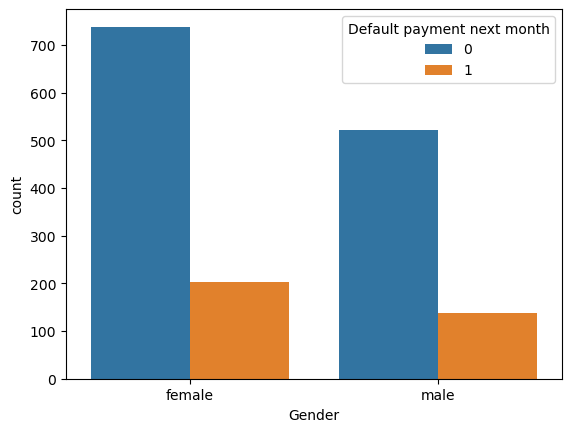

In [91]:
sns.countplot(data=df, x='Gender', hue='Default payment next month')
plt.show()

### From the graph, it can be seen that there is more not defaulting payment than those defaulting

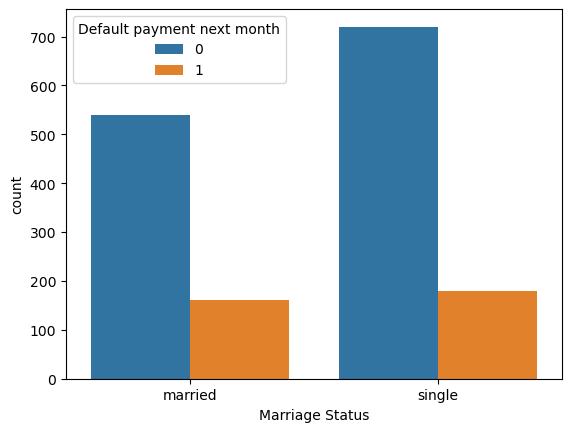

In [92]:
sns.countplot(data=df, x='Marriage Status', hue='Default payment next month')
plt.show()

### From the graph, singles are more likely to non default payments

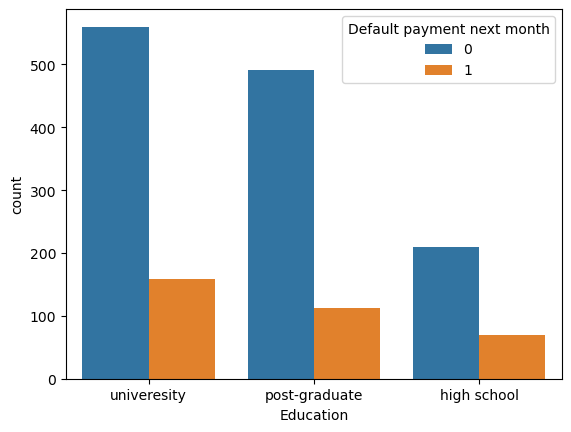

In [93]:
sns.countplot(data=df, x='Education', hue='Default payment next month')
plt.show()

### There are more non defaulting payment than those defaulting payment

<Axes: xlabel='Gender', ylabel='Credit Limit'>

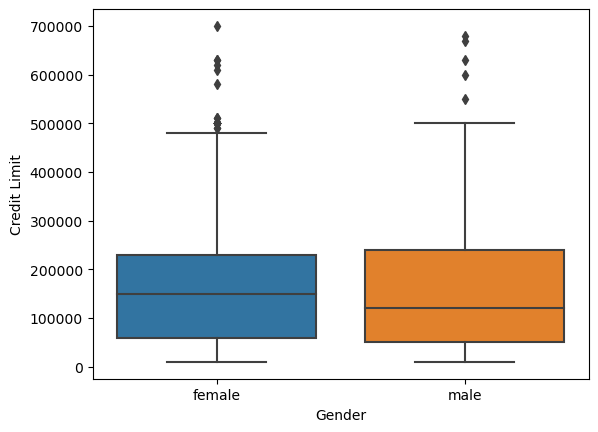

In [94]:
sns.boxplot(data=df, x = 'Gender', y='Credit Limit')

### From the box and whisker graph, female have a higher median credit limit than male.

C:\Users\kieny\AppData\Local\Temp\ipykernel_3164\618682710.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


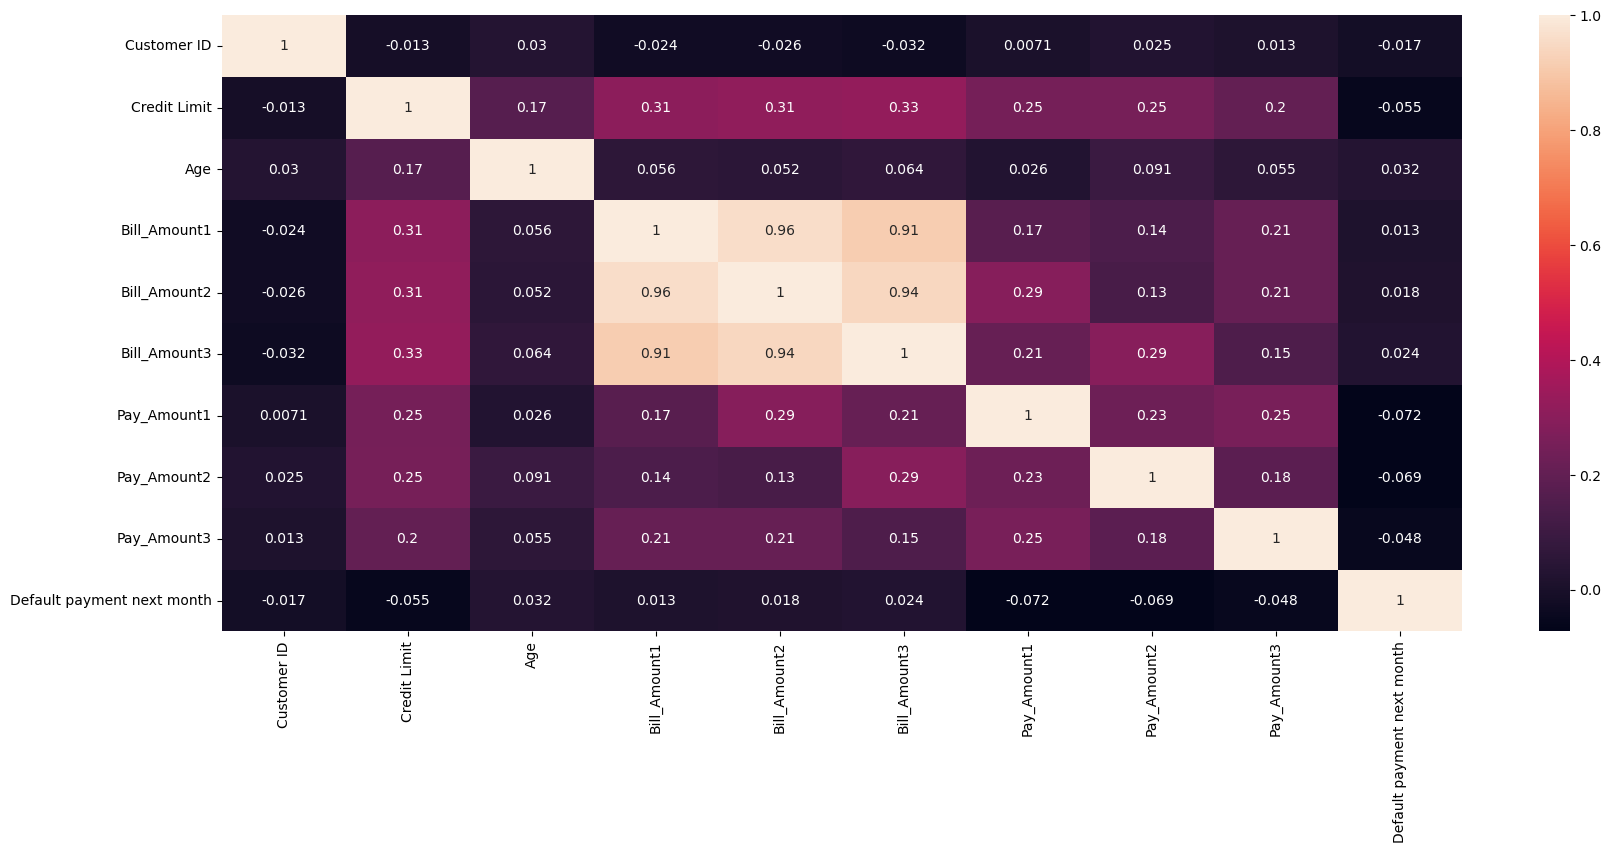

In [95]:
plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [96]:
#Imbalanced Dataset
df['Default payment next month'].value_counts()

0    1260
1     340
Name: Default payment next month, dtype: int64

## Data Preprocessing and Feature Engineering

### Feature engineer is the process to create additional relevant features from the existing raw features of the data to improve the learning algorithm.<br> ‘zeroBill’ is created to sieve out those people who do not have a bill at the end of the month.

In [97]:
testDF = df.copy()

#Renaming typo error
testDF['Education'] = testDF['Education'].replace('univeresity', 'university')

#Encode Categorical Data
testDF = pd.get_dummies(testDF,columns = ['Gender','Education','Marriage Status'],drop_first=True)

#Feature Engineering
testDF['zeroBill'] = (testDF['Bill_Amount1']==0) & (testDF['Bill_Amount2']==0) & (testDF['Bill_Amount3']==0)
testDF['zeroBill'] = testDF['zeroBill'].astype(int)

### Rows that contain ‘0’ for Bill_Amount1, , Bill_Amount2, Bill_Amount3, Pay_Amount1, Pay_Amount2, Pay_Amount3, Default payment next month are all dropped as people who do not have bills will naturally non default payment. Hence, improving the model’s accuracy.

In [98]:
#Extracting rows where billamt1,2,3, payamount1,2,3 and default payment equals to 0, then dropping them
zero_rows= (testDF['Bill_Amount1']==0) & (testDF['Bill_Amount2']==0) & (testDF['Bill_Amount3']==0) & (testDF['Pay_Amount1']==0) & (testDF['Pay_Amount2']==0) & (testDF['Pay_Amount3']==0) & (testDF['Default payment next month']==0)
print('Before dropping zero rows')
print(testDF.shape)
testDF = testDF.drop(testDF[zero_rows].index)
print('After dropping zero rows')
print(testDF.shape)

Before dropping zero rows
(1600, 15)
After dropping zero rows
(1560, 15)


### Feature Selection is done to get rid of features that are redundant by taking the best subset of the dataset.<br><br> X drops the target variable (‘Default payment next month’) and identifying column (‘Customer ID’).<br> y is the target variable (‘Default payment next month’)<br>'0': non default (customer will pay the bill)<br>'1': default (customer will not pay the bill)

In [99]:
#Defining X and y
X = testDF.drop(['Default payment next month','Customer ID'],axis=1)
y = testDF['Default payment next month']

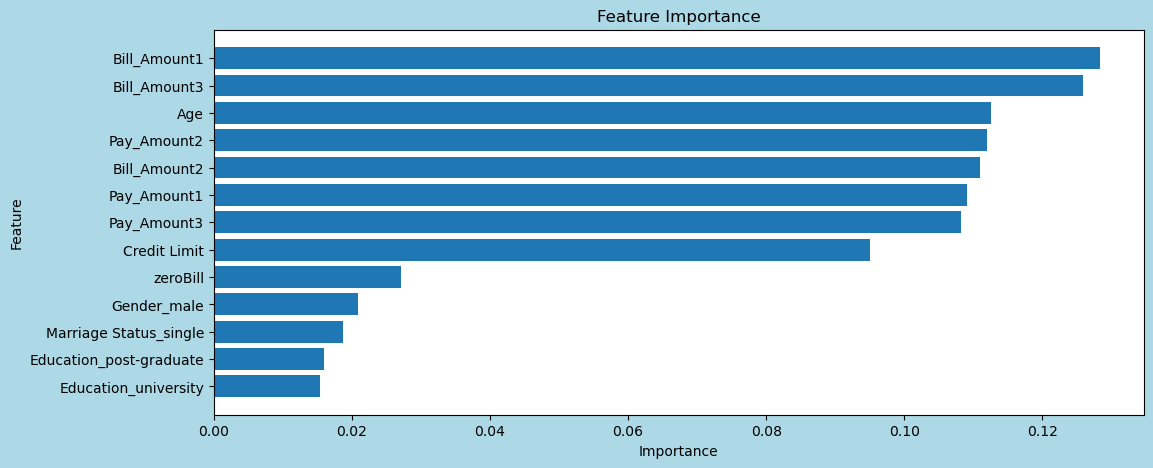

In [100]:
#Feature Importance Ranking
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X,y)
featureImportance = pd.DataFrame({'Feature': X.columns, 'Importance':randomForest.feature_importances_})
featureImportance = featureImportance.sort_values('Importance',ascending=True)

#Plotting the graph
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot()
fig.set_facecolor("lightblue")
ax1.set_title("Feature Importance")
ax1.set_xlabel("Importance")
ax1.set_ylabel("Feature")
ax1.barh(featureImportance['Feature'], featureImportance['Importance'])
plt.show()

### The feature importance graph shows that:<br><br>- The model relies heavily on the bill amount to predict if one will default payment.<br>- The model relies on the education the least when predicting if one will default payment<br>- This also means that bill amount strongly correlates if one will default payment


## Modelling

### An 80:20 ratio between training and test data is chosen where 80% of the data is for training and 20% is for testing.

In [101]:
#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=32)

### Algorithms Used:<br><br>1. Logistic Regression<br>2. Gradient Boosting Classifier<br>3. Random Forest<br>4. GaussianNB<br>5. HistGradientBoosting Classifier

### Why I choose these algorithms?<br><br><u>Logistic Regression</u><br><br>- Predict binary variable/likelihood of an event (0 = ‘non default’, 1 = ‘default’ )<br>- Handles categorical variable.<br>- Performs well in smaller dataset (1600 Rows, 13 Columns).<br>- Easy to implement.<br>- Low bias and high variance<br><br><u>Gradient Boosting Classifier</u><br><br>-One of the most powerful algorithms in machine learning<br>-Good at decreasing the bias error.<br>-A variety of options to choose from when hyperparameter tuning<br><br><u>Random Forest</u><br><br>- Good predictions that can be easily understood over decision trees.<br>- Reduces overfitting by averaging multiple decision trees.<br>- Not sensitive by outliers.<br><br><u>GaussianNB</u><br><br>- Easy to Implement<br>- Fast predictions<br>- Easy to understand algorithm<br>- Can predict well with less data<br>- Higher bias and low variance<br><br><u>HistGradientBoosting Classifier</u><br><br>- Histogram Based Gradient Boosting<br>- Able to handle numeric and categorical variable<br>- Able to recognize complex patterns which results in more accurate prediction

## Test and Score Before Hyperparameter Tuning

In [102]:
#Accuracy on test data
#Import the needed modules
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier

#Models used
clfs =[('Logistic_Regression', LogisticRegression()), 
       ('Gradient_Boosting', GradientBoostingClassifier()),
       ('Random_Forest', RandomForestClassifier()),
       ('GaussianNB',GaussianNB()),
       ('HGB',HistGradientBoostingClassifier()),]

#Scaling the models then scoring the accuracy
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f'The accuracy score on test data for {name}: {acc_score:.3f}')
    print()

The accuracy score on test data for Logistic_Regression: 0.811

The accuracy score on test data for Gradient_Boosting: 0.804

The accuracy score on test data for Random_Forest: 0.824

The accuracy score on test data for GaussianNB: 0.795

The accuracy score on test data for HGB: 0.824



### Random Forest Algorithm has a highest Accuracy Score of 0.814 compared to the other algorithms.  This tells us that the model is good at making accurate predictions on the likelihood of an ‘unseen’ person that will default payment

In [103]:
# Accuracy using cross validation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=6, shuffle=True, random_state=32)
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    cv_results = cross_val_score(pipeline,X_train,y_train,cv=kf)
    print(f'The cv accuracy score for {name}: {np.mean(cv_results):.3f}')
    print()

The cv accuracy score for Logistic_Regression: 0.792

The cv accuracy score for Gradient_Boosting: 0.784

The cv accuracy score for Random_Forest: 0.785

The cv accuracy score for GaussianNB: 0.782

The cv accuracy score for HGB: 0.775



### Gaussian Naïve Bayes Algorithm has a highest Cross Validation AUC Score of 0.782 compared to the other algorithms.  This tells us that the model making accurate prediction 78% of the time.

In [104]:
#Scoring through classification report
pipelines = []
scores_df = pd.DataFrame(columns = ['Model', 'F1_Score', 'Precision', 'Recall','Accuracy'])

for clf_name,clf in clfs:
    pipeline = Pipeline(steps = [
            ('scalor',StandardScaler()),
            ('classifier',clf)])
    
    pipeline.fit(X_train,y_train)
    pipelines.append(pipeline)
    y_pred = pipeline.predict(X_test)
    
    new_row = {'Model': clf_name,
              'F1_Score': metrics.f1_score(y_test,y_pred,average='weighted'),
              'Precision': metrics.precision_score(y_test,y_pred,average='weighted'),
              'Recall': metrics.recall_score(y_test,y_pred,average='weighted'),
              'Accuracy': metrics.accuracy_score(y_test,y_pred)}
    scores_df = pd.concat([scores_df,pd.DataFrame([new_row])],ignore_index=True)
print(scores_df)

                 Model  F1_Score  Precision    Recall  Accuracy
0  Logistic_Regression  0.732119   0.753732  0.810897  0.810897
1    Gradient_Boosting  0.758838   0.748448  0.798077  0.798077
2        Random_Forest  0.769860   0.773570  0.814103  0.814103
3           GaussianNB  0.737892   0.719921  0.794872  0.794872
4                  HGB  0.797400   0.796179  0.823718  0.823718


### HGB Algorithm has a highest F1 Score of 0.797 compared to the other algorithms. This tells us that the model have high precision and recall. In turn, the algorithm is able to produce more relevant results which also leads to higher performance.

### From the 3 test and score results obtained,<br>- Random Forest has the highest accuracy on test data.<br>- Gradient Boosting has the highest cross validation accuracy score<br>- HGB has the highest F1 Score

## Hyperparameter Tuning

### Now, I will hyperparameter tune the model to further improve the accuracy by customising the parameters for the algorithm.<br><br>1. Define a param grid for each model, and parameters I would like to test<br>2. GridSearchCV will loop through all the different types of combinations.<br>3. Upon looping through all the combinations, it will provide me with the best parameter combinations and highest score obtained.

In [33]:
#Hyperparameter tuning Logistic Regression
from sklearn.model_selection import GridSearchCV, KFold
logreg = LogisticRegression()
parameters = {'C': [0.01,0.1,1],'penalty': ['l1','l2'],'solver': ['liblinear','newton-cg','saga'],'max_iter':[100,200,300]}
grid = GridSearchCV(logreg, param_grid=parameters, cv=5)
best_clf = grid.fit(X_train,y_train)
print("score = %3.3f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line sear

C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\utils\optimiz

C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conver

C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\kieny\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\kieny\anaconda3\lib\site-pa

score = 0.811
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\kieny\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kieny\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kieny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver

In [30]:
#Hyperparameter tuning Gradient Boosting Classifier
from sklearn.model_selection import GridSearchCV
gradient = GradientBoostingClassifier()
parameters = {
    'learning_rate': [0.1, 0.01, 1],
    'max_depth': [3, 5,7],
    'n_estimators':[100,200,300],
    'max_features':['sqrt','log2'],
    'min_samples_split':[2,5,10]
}
grid = GridSearchCV(gradient, param_grid=parameters, cv=5)
best_clf = grid.fit(X_train,y_train)
print("score = %3.3f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.811
{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 300}


## Test And Scores After Hyperparameter Tuning

In [105]:
#Accuracy using test data
#Models used
clfs =[('Logistic_Regression', LogisticRegression(C= 1, max_iter= 100, penalty='l1', solver= 'liblinear')), 
       ('Gradient_Boosting', GradientBoostingClassifier(learning_rate= 0.01, max_depth= 5, max_features= 'log2', min_samples_split= 5, n_estimators= 300)),
       ('Random_Forest', RandomForestClassifier()),
       ('GaussianNB',GaussianNB()),
       ('HGB',HistGradientBoostingClassifier()),]

#Scaling the models then scoring the accuracy
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f'The accuracy score on test data for {name}: {acc_score:.3f}')
    print()

The accuracy score on test data for Logistic_Regression: 0.811

The accuracy score on test data for Gradient_Boosting: 0.811

The accuracy score on test data for Random_Forest: 0.817

The accuracy score on test data for GaussianNB: 0.795

The accuracy score on test data for HGB: 0.824



In [106]:
# Accuracy using cross validation
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,KFold
kf = KFold(n_splits=6, shuffle=True, random_state=32)
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    cv_results = cross_val_score(pipeline,X_train,y_train,cv=kf)
    print(f'The cv accuracy score for {name}: {np.mean(cv_results):.3f}')
    print()

The cv accuracy score for Logistic_Regression: 0.793

The cv accuracy score for Gradient_Boosting: 0.792

The cv accuracy score for Random_Forest: 0.788

The cv accuracy score for GaussianNB: 0.782

The cv accuracy score for HGB: 0.775



In [107]:
#Scoring through classification report
pipelines = []
scores_df = pd.DataFrame(columns = ['Model', 'F1_Score', 'Precision', 'Recall','Accuracy'])

for clf_name,clf in clfs:
    pipeline = Pipeline(steps = [
            ('scalor',StandardScaler()),
            ('classifier',clf)])
    
    pipeline.fit(X_train,y_train)
    pipelines.append(pipeline)
    y_pred = pipeline.predict(X_test)
    
    new_row = {'Model': clf_name,
              'F1_Score': metrics.f1_score(y_test,y_pred,average='weighted'),
              'Precision': metrics.precision_score(y_test,y_pred,average='weighted'),
              'Recall': metrics.recall_score(y_test,y_pred,average='weighted'),
              'Accuracy': metrics.accuracy_score(y_test,y_pred)}
    scores_df = pd.concat([scores_df,pd.DataFrame([new_row])],ignore_index=True)
print(scores_df)

                 Model  F1_Score  Precision    Recall  Accuracy
0  Logistic_Regression  0.732119   0.753732  0.810897  0.810897
1    Gradient_Boosting  0.754117   0.771438  0.814103  0.814103
2        Random_Forest  0.753988   0.745825  0.801282  0.801282
3           GaussianNB  0.737892   0.719921  0.794872  0.794872
4                  HGB  0.797400   0.796179  0.823718  0.823718


### After tuning the models,<br><br> 1. Gradient Boosting Accuracy on Test Data increased from 0.804 to 0.811 and cross validation score increased from 0.784 to 0.792.<br>2. Logistic Regression’s Accuracy on Test Data remained stagnant while the cross-validation accuracy score only increased by 0.01.<br><br>Overall, hyperparameter tuning is not as effective for my classification model.

## Evaluation

In [108]:
#Models used
clfs =[('Logistic_Regression', LogisticRegression(C= 1, max_iter= 100, penalty='l1', solver= 'liblinear')), 
       ('Gradient_Boosting', GradientBoostingClassifier(learning_rate= 0.01, max_depth= 5, max_features= 'log2', min_samples_split= 5, n_estimators= 300)),
       ('Random_Forest', RandomForestClassifier()),
       ('GaussianNB',GaussianNB()),
       ('HGB',HistGradientBoostingClassifier()),]

#Scaling the models then scoring the accuracy
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name}:')
    print(f'{cm}')
    print()

Logistic_Regression:
[[252   1]
 [ 58   1]]

Gradient_Boosting:
[[250   3]
 [ 54   5]]

Random_Forest:
[[245   8]
 [ 52   7]]

GaussianNB:
[[244   9]
 [ 55   4]]

HGB:
[[241  12]
 [ 43  16]]



### From the 5 algorithms chosen, all algorithms are able to give good accurate predictions on whether one will default payment.<br>However, Logistic Regression and Gradient Boosting stood out among the rest<br><br>Logistic Regression algorithm is able to correctly predict and classify 252 people as ‘non-default’ while incorrectly predicting 1 person as ‘default’. As well as correctly predicting and classifying 1 person as ‘default’ while incorrectly predicting 58 people as ‘non-default’<br><br>HistGradientBoosting algorithm is able to correctly predict and classify 241 people as ‘non-default’ while incorrectly predicting 12 person as ‘default’. As well as correctly predicting and classifying 16 person as ‘default’ while incorrectly predicting 43 people as ‘non-default’

### Imbalanced dataset will result in the model being bias towards the majority class. This will result in the model accurately predicting ‘non default’ more and not as accurate when predicting ‘default’.

Logistic_Regression Roc Auc Score:0.640
Gradient_Boosting Roc Auc Score:0.672
Random_Forest Roc Auc Score:0.689
GaussianNB Roc Auc Score:0.602
HGB Roc Auc Score:0.653


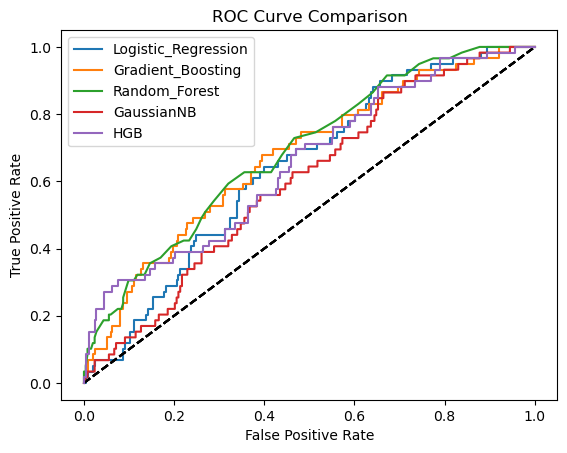

In [109]:
#Import the needed modules
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve

#Models used
clfs =[('Logistic_Regression', LogisticRegression(C= 1, max_iter= 100, penalty='l1', solver= 'liblinear')), 
       ('Gradient_Boosting', GradientBoostingClassifier(learning_rate= 0.01, max_depth= 5, max_features= 'log2', min_samples_split= 5, n_estimators= 300)),
       ('Random_Forest', RandomForestClassifier()),
       ('GaussianNB',GaussianNB()),
       ('HGB',HistGradientBoostingClassifier()),]

#Scaling the models then scoring the accuracy
for name,clf in clfs:
    pipeline = Pipeline(steps = [('scaler',StandardScaler()),('classifier',clf)])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_probs = pipeline.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=name)
    print(f'{name} Roc Auc Score:{roc_auc_score(y_test,y_pred_probs):.3f}')
    
    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()       

## Dummy Baseline

In [110]:
from sklearn.dummy import DummyClassifier
dummyCLF = DummyClassifier(strategy='most_frequent')
dummyCLF.fit(X_train,y_train)
y_pred = dummyCLF.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f'Dummy Baseline Accuracy: {acc_score:.3f}')

Dummy Baseline Accuracy: 0.811


### In Conclusion, this dataset has given me a deep understanding on the likelihood of one defaulting payment.<br><br> As compared to a dummy baseline, my model accuracy increased, my model is able to capture patterns in the data and make more accurate predictions.<br><br> Upon considering all 3 different accuracy reports, all models makes good predictions. HistogramGradientBoosting is my most accurate model to predict if one will default payment.
